**Masking of acetone**

Masking using SMILES representation Like natural language sentences can be broken down into tokens and used for masked language modeling, SMILES strings can also be tokenized and masked as shown in the example of acetone below.

Example: SMILES Representation: CC(=O)C

Masked SMILES Representation: CC([MASK]O)C

There are a number of chemically valid predictions for this mask. Here is a list of a few of them. 

Chemically Valid Masked Token Solutions:
1. CC(=O)C
2. CC(-O)C
3. CC(NO)C
4. CC(CO)C

**Learning objectives**

1.   Visualize sets of molecules in a compact way
2.   Highlight substructures of interest:

  (i) highlight bonds/atoms by number

  (ii)  highlight sets of bonds or atoms that are different  


In [1]:

#to play with and display chemical structures
!pip install rdkit-pypi
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import Draw as ChemDraw
from rdkit.Chem.Draw import MolToImage

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import colors

In [4]:
import rdkit.Chem.rdFMCS as rdFMCS

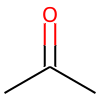

In [5]:
acetone_smiles='CC(=O)C'
molecule_smiles=acetone_smiles
mol=Chem.MolFromSmiles(molecule_smiles)
filename='acetone.png'
ChemDraw.MolToFile(mol,filename, size=(100, 100))
MolToImage(mol,size=(100,100))


In [6]:
def addmask(molecule_str,mask_str,mask_start_pos,mask_end_pos):
  masked=''
  for counter0 in range(len(molecule_str)):
    if mask_len>0:
      if counter0 in range(mask_start_pos,mask_end_pos):
        masked+=''
      elif counter0 == mask_end_pos:
        masked+=mask_str
      else:
        masked+=molecule_str[counter0]
    else:
        masked+=molecule_str[counter0]
  #print(masked)
  return masked

molecule_str=acetone_smiles

mask_start_pos=3
mask_end_pos=mask_start_pos
mask_len=mask_end_pos-mask_start_pos+1
mask_str='[mask]'

substructure_smarts=molecule_str[mask_start_pos:mask_start_pos+mask_len]
print(substructure_smarts)

masked_moleculestring=addmask(molecule_str,mask_str,mask_start_pos,mask_end_pos)
print(masked_moleculestring)

=
CC([mask]O)C


#Show mask

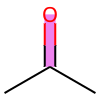

In [7]:

Cell_label='Visualize potential mask sites on molecule'
Bonds_list=[1]
#highlight
hcolor = colors.to_rgb('violet')
filename='acetone_mask.png'
ChemDraw.MolToFile(mol,filename, size=(100, 100),fitImage=True,highlightBonds=Bonds_list,highlightColor=hcolor)
MolToImage(mol, size=(100, 100),fitImage=True,highlightBonds=Bonds_list,highlightColor=hcolor)



#Show Predictions

CC(=O)C
CC(-O)C
CC(NO)C
CC(CO)C


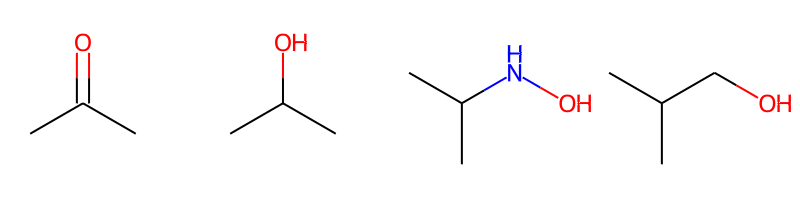

In [18]:
predictions= [masked_moleculestring.replace(mask_str,x) for x in ['=','-','N','C']]

for string in predictions:
  print(string)

predictions_mols = [Chem.MolFromSmiles(x) for x in predictions]
ChemDraw.MolsToGridImage(predictions_mols,molsPerRow=len(predictions))



#Highlight sets of bonds or atoms that are different 

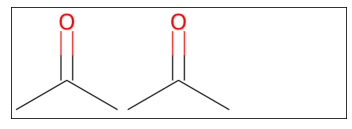

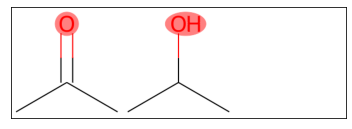

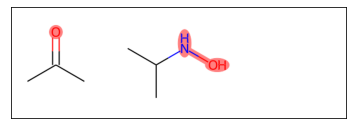

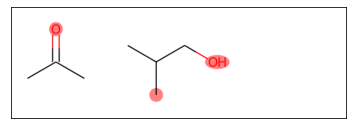

In [19]:
#https://www.rdkit.org/docs/Cookbook.html


def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return ChemDraw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])


mol1=mol
for mol2 in predictions_mols:
  plt.figure()
  plt.imshow(view_difference(mol1,mol2))
  plt.xticks([])
  plt.yticks([])

  #Has an error in the last prediction


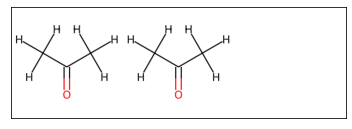

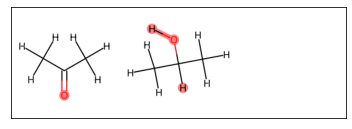

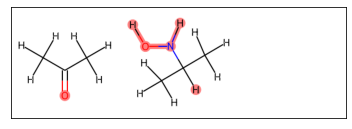

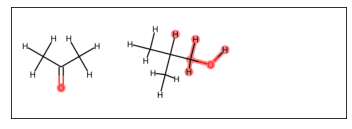

In [10]:
def view_difference_Hs(mol1, mol2):
    mol1=Chem.AddHs(mol1)
    mol2=Chem.AddHs(mol2)
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return ChemDraw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])


mol1=mol
for mol2 in predictions_mols:
  plt.figure()
  plt.imshow(view_difference_Hs(mol1,mol2))
  plt.xticks([])
  plt.yticks([])

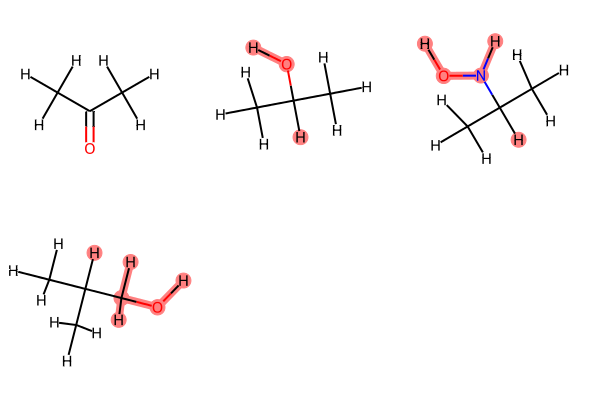

In [12]:
def difference_Hs_2(mol1, mol2):
    mol1=Chem.AddHs(mol1)
    mol2=Chem.AddHs(mol2)
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return target_atm2


originalmol=mol
HighlightDiffList=[]
valid_mols_list_Hs=[]
for mols in predictions_mols:
  HighlightDiffList.append(difference_Hs_2(originalmol, mols))
  valid_mols_list_Hs.append(Chem.AddHs(mols))

ChemDraw.MolsToGridImage(valid_mols_list_Hs,highlightAtomLists=HighlightDiffList)


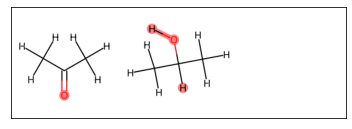

In [14]:
mol1=mol
mol2=predictions_mols[1]
plt.imshow(view_difference_Hs(mol1,mol2))
plt.xticks([])
plt.yticks([])
filename='compare_differences_in_masked_prediction.png'
plt.savefig(filename)
